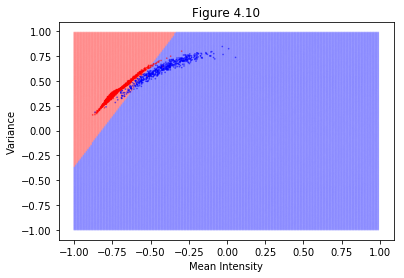

In [2]:
import operator as operator
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as mp
from pylab import show

import math
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#NOTE: input the training set (and correct outputs) as x and y, when calling NeuralNetwork()
#It automatically trains, so you don't need to call the train function
np.random.seed(100)

def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def sigmoid_derivative(p):
    return p * (1 - p)

class NeuralNetwork:
    def __init__(self,x = [[]],y = [],numLayers=2,numNodes=2,eta=1,maxIter=10000):
        self.input = np.array(x)
        self.y = y
        self.numLayers = numLayers
        self.numNodes = numNodes + 1 #make room for the bias node
        self.eta = eta
        self.maxIter = maxIter
        self.output = []
        self.weights = [np.random.uniform(-1,1,(len(x[0]), self.numNodes))] #create the weights from the inputs to the first layer
        
        for i in range(numLayers-1):
            self.weights.append(np.random.uniform(-1,1,(self.numNodes, self.numNodes))) #create the random weights between internal layers
        self.weights.append(np.random.uniform(-1,1,(self.numNodes, 1))) #create weights from final layer to output node
        self.train(learningRate=eta, maxIterations=maxIter)

    def train(self, learningRate, maxIterations):
        for i in range(self.maxIter):
            self.feedforward()
            self.backprop()

    def predict(self,x=[]):
        self.input = x
        self.feedforward()
        #commented out because I figured you'd do something with the actual sigmoid values when they're returned
        for i in self.output:
            if(i[0] < .5):
                i[0] = 0 #predict a 1
            else:
                i[0] = 1 #predict a 5
        return self.output

    def feedforward(self):
        self.layerData = [] 
        oneLayer = np.dot(self.input, self.weights[0]) #2D array
        self.layerData.append(sigmoid(oneLayer))
        
        for mat in self.layerData[0]:
            mat[self.numNodes-1] = 1 #set the bias node: 1
  
        #add layers in between input and output
        for i in range(1, self.numLayers):
            temp = np.dot(self.layerData[i-1], self.weights[i])
            self.layerData.append(sigmoid(temp))
            for mat in self.layerData[i]:
                mat[self.numNodes-1] = 1 #set the bias node: 1
        #add output layer
        temp = []
        temp = np.dot(self.layerData[self.numLayers - 1], self.weights[self.numLayers])
        self.layerData.append(sigmoid(temp))
        self.output = self.layerData[self.numLayers]
        
        
    def backprop(self):
        bpoutput = []  
        
        delta = (2*(self.y - self.output) * sigmoid_derivative(self.output))
        bpoutput.append(np.dot(self.layerData[self.numLayers-1].T, delta))
        dotWithCurrentLayer = []
        
        for i in range(self.numLayers-1, 0, -1):
            dotBPAndWeights = np.dot(delta, self.weights[i+1].T) #delta is the delta of the node 1 index higher
            delta = dotBPAndWeights * sigmoid_derivative(self.layerData[i])
            bpoutput.append(np.dot(self.layerData[i].T, delta))
        
        dotFirst = np.dot(delta, self.weights[1].T)
        delta = dotFirst * sigmoid_derivative(self.layerData[0])
        bpoutput.append(np.dot(self.input.T, delta))
                
        x = self.numLayers
        for mat in self.weights:
            mat += self.eta*bpoutput[x]
            x = x - 1
   
data = np.loadtxt("data.csv")

#shuffle the data and select training and test data
np.random.seed(100)
np.random.shuffle(data)

features = []
digits = []


for row in data:
    if(row[0]==1 or row[0]==5):
        features.append(row[1:]) #append a row of data to the end of the features array
        #NOTE BELOW: DIGITS USUALLY DOES digits.append(str(row[0])), I NEED TO CONVERT THAT TO [row[0]]
        #AND THEN, AFTER CALCULATING, RETURN AS str(row[0])
        if(row[0] == 1):
            digits.append([0]) #append the 1 or 5 to the digits array
        else:
            digits.append([1])
#select the proportion of data to use for training
numTrain = int(len(features)*.2) 

myXSum = 0
myYSum = 0
X = []
Y = []
simpleTrain = []
simpleAll = []
colors = []
for index in range(len(features)):
    myXSum = sum(features[index])
    myXSum = myXSum / 256    

    myYSum = np.var(features[index])
    #myYSum = sum(np.power(trainFeatures[index][:128] - trainFeatures[index][128:],2))/256
    X.append(myXSum)
    Y.append(myYSum)
    simpleAll.append([myXSum,myYSum])
    if(digits[index]==[0]):
        colors.append("r") #red is 1 
    else:
        colors.append("b") #blue is 5
simpleTrain = simpleAll[:numTrain] #beginning until numTrain will be the trainfeatures
simpleTest = simpleAll[numTrain:]  #numTrain until end will be the testfeatures
trainDigits = digits[:numTrain]     #beginning until numTrain will be the traindigits
testDigits = digits[numTrain:]      #numTrain until end will be the testdigits
model = NeuralNetwork(x = simpleTrain, y = trainDigits, eta = .001, maxIter = 20000)#, numNodes = 4, numLayers = 7)
xPred = []
yPred = []
cPred = []
for xP in range(-100,100):
    xP = xP/100.0
    for yP in range(-100,100):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        if(model.predict([[xP,yP]]) < 0.5):
            cPred.append("r") #red is 0 (1)
        else:
            cPred.append("b") #blue is 1 (5)
mp.title("Figure 4.10")
mp.xlabel("Mean Intensity")
mp.ylabel("Variance")
mp.scatter(xPred,yPred,s=1,c=cPred,alpha=.2)
mp.scatter(X, Y, s = .5, alpha = .5, c=colors)
show()